In [1]:
%matplotlib inline

import os
import re

import pandas as pd
import matplotlib.pyplot as plt

URL = 'http://www.autotyp.uzh.ch/download/release_2013/autotyp.csv'
CSV = URL.rpartition('/')[2]
FORMAT = {
    'encoding': 'utf-8',
    'na_values': '', 'keep_default_na': False,
    'index_col': 'LID'
}

if not os.path.exists(CSV):
    csv = pd.read_csv(URL, **FORMAT)
    csv.to_csv(CSV, encoding=FORMAT['encoding'])

csv = pd.read_csv(CSV, **FORMAT)
csv.info()
assert csv.index.is_unique

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2913 entries, 199 to 3213
Data columns (total 15 columns):
ISO639.3             2846 non-null object
language             2913 non-null object
alt.language.name    2873 non-null object
language.search      2913 non-null object
lsbranch             301 non-null object
ssbranch             529 non-null object
sbranch              1322 non-null object
mbranch              2070 non-null object
stock                2913 non-null object
alt.stock.name       366 non-null object
stock.search         2913 non-null object
longitude            2913 non-null float64
latitude             2913 non-null float64
area                 2913 non-null object
continent            2913 non-null object
dtypes: float64(2), object(13)
memory usage: 364.1+ KB


In [2]:
ISOS_SEMICOLON = r'[a-z]{3}(?:; [a-z]{3})*$'

df = csv.copy()
df.loc[~df['ISO639.3'].str.match(ISOS_SEMICOLON).fillna(True), :'language']

,ISO639.3,language
LID,,
123,"kau, knc",Kanuri
776,bwv; knh; ubm; xkl; xkm; xky; mqd; sib; boc; t...,Kenyah (Umaí Lung)
3042,(d)taq,Tamashek (Burkin Faso)
3117,d(nep),Nepali (Eastern)


In [3]:
SPECIAL = [
    'Pidgin', 'Creole', 'Crioulo',
    'Sign Language', u'Teckenspr\xe5ket', u'Tegnspr\xe5k', u'L\xedngua Gestual',
    'Lughat al-Isharat al-Lubnaniya', u'T\xfcrk Isaret Dili',
]
ANY_SPECIAL = r'|'.join(map(re.escape, SPECIAL))

df.loc[df['language'].str.contains(ANY_SPECIAL), :'language']

,ISO639.3,language
LID,,
770,NaN,Sign Language Hong Kong
781,NaN,Lughat al-Isharat al-Lubnaniya
799,NaN,Russian-Chinese Pidgin
836,ads,Sign Language Adamorobe
840,aed,Sign Language Argentinian
930,ase,Sign Language American
1012,bfi,Sign Language British
1062,brc,Berbice Dutch Creole
1089,bvs,Sign Language Flemish


In [4]:
PATHLEVELS = ['stock', 'mbranch', 'sbranch', 'ssbranch', 'lsbranch']
df[PATHLEVELS].apply(pd.Series.nunique).to_frame('nunique')

,nunique
stock,399
mbranch,236
sbranch,154
ssbranch,89
lsbranch,59


In [5]:
lf = df['mbranch'].fillna(df['stock']).to_frame('toplevel')
lf = df[['language']].join(lf)
lf['toplevel'].nunique()

593

In [6]:
_by_level = lf.groupby('toplevel')
_by_level['language'].agg(lambda x: ', '.join(sorted(x))).to_frame('languages')\
    .join(_by_level.size().to_frame('n'))

,languages,n
toplevel,,
!Ui-Taa,"!Xõo, Nǀuu, |Xam, ‡Hoan",4
Abkhazian-Ubykh,"Abaza, Abkhaz, Ubykh",3
Adamawa-Ubangi,"Baka (Cameroon), Barambu, Day, Dii, Dongo, Doy...",36
Aikaná,Aikaná,1
Ainu,Ainu,1
Aizi,"Dewoin, Grebo",2
Albanian,"Albanian, Arvanitika",2
Aleut,"Aleut, Aleut (Eastern)",2
Algonquian,"Abenaki (Western), Algonquin, Arapaho, Atikame...",31


In [7]:
df[['continent', 'area']].apply(pd.Series.nunique).to_frame('nunique')

,nunique
continent,10
area,24


In [8]:
df['continent'].value_counts().sort_index().rename_axis('continent').to_frame('n')

,n
continent,
Africa,654
Australia,189
C America,175
E N America,127
N-C Asia,135
NG and Oceania,515
S America,271
S/SE Asia,458
W N America,114


In [9]:
df['area'].value_counts().sort_index().rename_axis('area').to_frame('n')

,n
area,
African Savannah,375
Alaska-Oregon,59
Andean,47
Basin and Plains,68
California,47
E North America,69
Europe,142
Greater Abyssinia,61
Greater Mesopotamia,131


In [10]:
assert not df[PATHLEVELS].apply(lambda x: x.str.contains('>').any()).any()

def join(df, cols, sep='>'):
    cols = [c for k, c in df[cols].fillna('').iteritems()]
    return reduce(lambda x, y: x + sep + y, cols)

pf = join(df, PATHLEVELS)
pf.nunique()

828

In [11]:
lsize = pf.value_counts()
lsize.value_counts().sort_index()

1      402
2      148
3       86
4       42
5       26
6       28
7       15
8       11
9       14
10       6
11       5
12       3
13       3
14       5
15       2
16       3
17       3
18       5
19       4
21       2
22       3
23       3
24       2
25       1
29       1
31       1
33       1
35       1
98       1
141      1
dtype: int64

In [12]:
lsize[lsize > 50]

Benue-Congo>Bantoid>Bantu (narrow)>>                                    141
Austronesian>Malayo-Polynesian>Western Malayo-Polynesian non-clade>>     98
dtype: int64

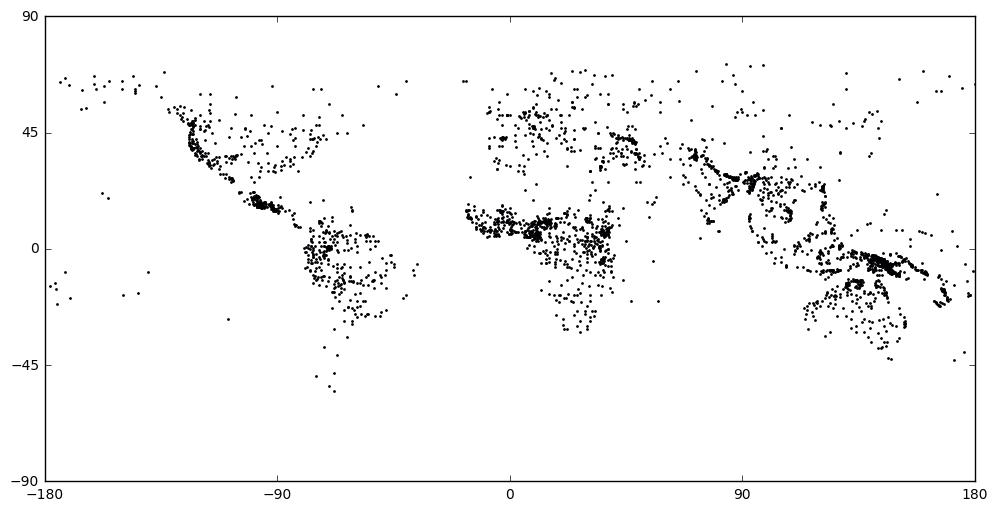

In [13]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.axis([-180, 180, -90, 90])
ax.set_xticks(range(-180, 181, 90))
ax.set_yticks(range(-90, 91, 45))
ax.scatter('longitude', 'latitude', 1, data=df);

In [14]:
valid_coord = df['latitude'].between(-90, 90) & df['longitude'].between(-180, 180)
df.loc[~valid_coord, ['ISO639.3', 'language', 'latitude', 'longitude']]

,ISO639.3,language,latitude,longitude
LID,,,,
3032,aot,Atong,25.32,907.0


In [15]:
import sqlalchemy as sa

engine = sa.create_engine('postgresql://postgres@/glottolog2.7')

query = sa.text('''SELECT i.name AS "iso639-3",
    l.id AS glottocode, l.name, l.latitude, l.longitude
FROM language AS l JOIN languoid AS ll USING (pk)
JOIN languageidentifier AS li ON li.language_pk = l.pk
JOIN identifier AS i ON li.identifier_pk = i.pk AND i.type = 'iso639-3'
WHERE l.latitude IS NOT NULL ORDER BY "iso639-3"''')

gf = pd.read_sql_query(query, engine, index_col='iso639-3')
gf.info()
assert gf.index.is_unique

<class 'pandas.core.frame.DataFrame'>
Index: 7383 entries, aaa to zzj
Data columns (total 4 columns):
glottocode    7383 non-null object
name          7383 non-null object
latitude      7383 non-null float64
longitude     7383 non-null float64
dtypes: float64(2), object(2)
memory usage: 288.4+ KB


In [16]:
COLS = ['ISO639.3', 'language', 'latitude', 'longitude']

af = df.loc[df['ISO639.3'].notnull(), COLS]\
    .reset_index().set_index(['ISO639.3', 'LID']).sort_index().reset_index('LID')
afu = af.groupby(level=0).filter(lambda g: len(g) > 1 and
    (g[['latitude', 'longitude']].apply(pd.Series.nunique) > 1).any())
af = af.drop(afu.index)
af = af[~af.index.duplicated()]
af.info()
assert af.index.is_unique

<class 'pandas.core.frame.DataFrame'>
Index: 2479 entries, (d)taq to zza
Data columns (total 4 columns):
LID          2479 non-null int64
language     2479 non-null object
latitude     2479 non-null float64
longitude    2479 non-null float64
dtypes: float64(2), int64(1), object(1)
memory usage: 96.8+ KB


In [17]:
cf = gf.join(af, how='inner', rsuffix='_at')
cf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2374 entries, aaa to zwa
Data columns (total 8 columns):
glottocode      2374 non-null object
name            2374 non-null object
latitude        2374 non-null float64
longitude       2374 non-null float64
LID             2374 non-null int64
language        2374 non-null object
latitude_at     2374 non-null float64
longitude_at    2374 non-null float64
dtypes: float64(4), int64(1), object(3)
memory usage: 166.9+ KB


In [18]:
ccf = pd.concat([
    cf[['latitude', 'longitude']].assign(at=False).set_index('at', append=True),
    af[['latitude', 'longitude']].assign(at=True).set_index('at', append=True),
    ]).unstack().dropna()
diff = ccf.xs(False, level='at', axis=1) - ccf.xs(True, level='at', axis=1)
cf[(diff.abs() > 10).any(axis=1)]

,glottocode,name,latitude,longitude,LID,language,latitude_at,longitude_at
abz,abui1241,Abui,-8.310580,124.588000,2985,Abui,-6.12,150.77
aot,aton1241,A'tong,25.346508,90.658722,3032,Atong,25.32,907.00
arb,stan1318,Standard Arabic,27.962500,43.852500,23,Arabic,30.00,31.00
crk,plai1258,Plains Cree,51.243700,-110.463000,59,Cree (Plains),52.00,-80.00
got,goth1244,Gothic,46.930400,29.978600,2832,Gothic,57.50,18.55
ikt,west2618,Western Canadian Inuktitut,64.348600,-96.148000,1280,Kangiryuarmiut,68.33,-133.75
jct,krym1236,Krymchak,39.841200,66.380500,1444,Krymchak,45.00,34.25
kdx,kamm1249,Kam,8.043570,10.886500,1264,Kam (Zhanglu),26.00,108.50
kiz,kisi1243,Kisi,-9.930000,34.482500,643,Kisi,8.50,-10.10
kjh,khak1248,Khakas,50.739300,107.169000,1763,Khakas,53.00,90.00
